In [52]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [53]:
df_skills_us = df[(df['job_country'] == 'United States') & (df['job_title']=='Data Analyst')].copy()

df_skills_us = df_skills_us.explode(['job_skills']).copy()

In [54]:
df_skills_us_pivot = df_skills_us.pivot_table(
    values='salary_year_avg',
    index='job_skills',
    aggfunc='median'
)

df_skills_us_pivot = df_skills_us_pivot.sort_values('salary_year_avg', ascending=False)

Text(0, 0.5, 'Job Skill')

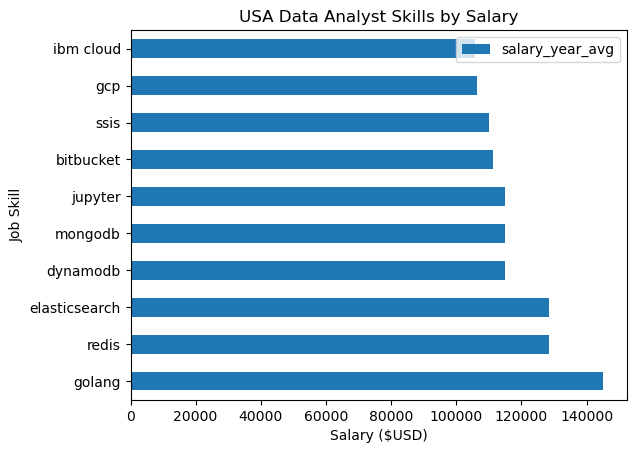

In [55]:
df_skills_us_pivot.head(10).plot(kind='barh')
plt.title('USA Data Analyst Skills by Salary')
plt.xlabel('Salary ($USD)')
plt.ylabel('Job Skill')


In [56]:
skill_counts = df_skills_us['job_skills'].value_counts()


<Axes: ylabel='job_skills'>

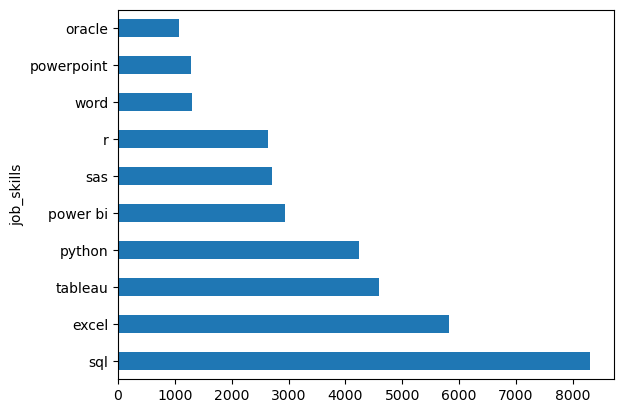

In [57]:
skill_counts.head(10).plot(kind='barh')

In [58]:
df_skills_us = df_skills_us.dropna(subset='salary_year_avg')

df_DA_group = df_skills_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_top_pay = df_DA_group.sort_values(by = 'median', ascending=False).head(10)
df_da_top_skills = df_DA_group.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False)

In [59]:
df_da_top_pay

,count,median
job_skills,,
golang,1,145000.0
redis,1,128500.0
elasticsearch,3,128500.0
dynamodb,1,115000.0
mongodb,14,115000.0
jupyter,5,115000.0
bitbucket,1,111175.0
ssis,23,110000.0
gcp,12,106250.0


In [60]:
df_da_top_skills

,count,median
job_skills,,
aws,75,92500.0
python,408,90000.0
tableau,398,90000.0
r,244,90000.0
sql,714,87500.0
power bi,279,87500.0
sas,200,84078.5
excel,472,77500.0
powerpoint,102,77500.0


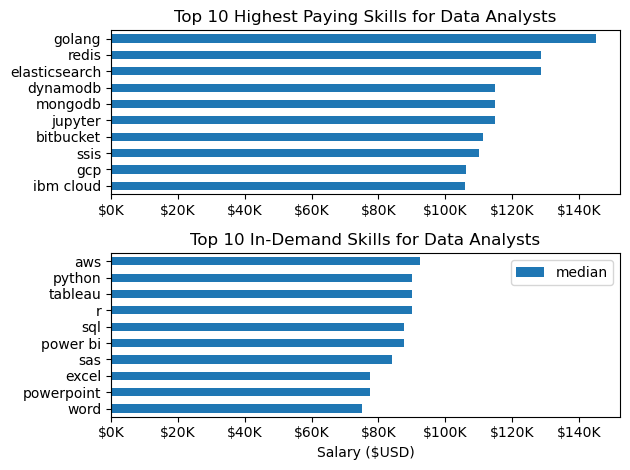

In [69]:
fig, ax = plt.subplots(2, 1)

df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


df_da_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()